# 💠Recommendation System💠

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

## 💠Data Preprocessing

In [20]:
data=pd.read_csv('anime.csv')
print('Shape of data ',data.shape)
data.head()

Shape of data  (12294, 7)


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [21]:
data.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [22]:
data=data.dropna()
data.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [23]:
data.duplicated().sum()

0

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12017 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12017 non-null  int64  
 1   name      12017 non-null  object 
 2   genre     12017 non-null  object 
 3   type      12017 non-null  object 
 4   episodes  12017 non-null  object 
 5   rating    12017 non-null  float64
 6   members   12017 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 751.1+ KB


In [25]:
data=data[data['episodes']!='Unknown']

In [26]:
data['episodes']=data['episodes'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11830 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  11830 non-null  int64  
 1   name      11830 non-null  object 
 2   genre     11830 non-null  object 
 3   type      11830 non-null  object 
 4   episodes  11830 non-null  int32  
 5   rating    11830 non-null  float64
 6   members   11830 non-null  int64  
dtypes: float64(1), int32(1), int64(2), object(3)
memory usage: 693.2+ KB


[]

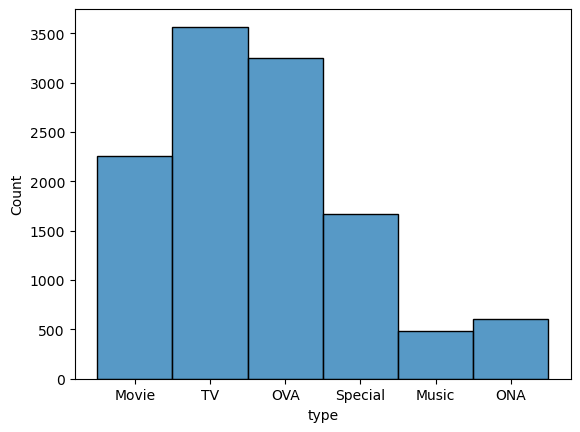

In [29]:
sns.histplot(data['type'])
plt.plot()

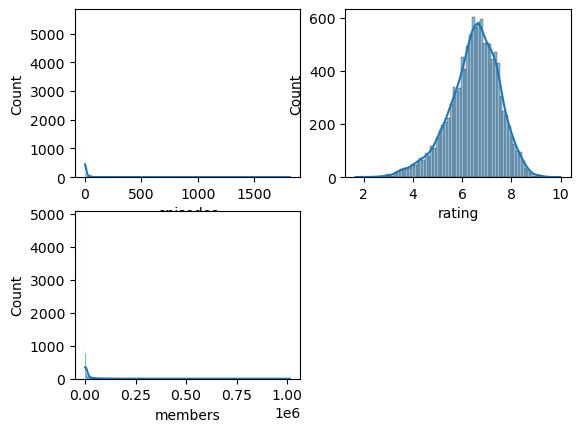

In [37]:
num_columns=[ 'episodes', 'rating', 'members']

for i,j in enumerate(num_columns):
    plt.subplot(2,2,i+1)
    sns.histplot(data[j],kde=True)
plt.show()

## 💠Feature Extraction:

In [41]:
df = data['genre'].str.get_dummies(',')

In [10]:
data=pd.concat([data,df],axis=1)
data.head()

,anime_id,name,genre,type,episodes,rating,members,Adventure,Cars,Comedy,...,Shoujo,Shounen,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [12]:
features=data.drop(columns=['anime_id', 'name', 'genre', 'type','members'],axis=1)
features.head()

,episodes,rating,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,...,Shoujo,Shounen,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi
0,1,9.37,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,64,9.26,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,51,9.25,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,24,9.17,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,51,9.16,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
Scaler=MinMaxScaler()
features[['episodes','rating']]=Scaler.fit_transform(features[['episodes','rating']])

features.head()

,episodes,rating,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,...,Shoujo,Shounen,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi
0,0.000000,0.924370,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.034673,0.911164,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.027518,0.909964,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.012658,0.900360,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.027518,0.899160,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 💠Recommendation System

In [15]:
matrix = cosine_similarity(features)
matrix

array([[1.        , 0.13660032, 0.13644327, ..., 0.15085848, 0.15492584,
        0.1737458 ],
       [0.13660032, 1.        , 0.36143579, ..., 0.11709589, 0.12023337,
        0.13483898],
       [0.13644327, 0.36143579, 1.        , ..., 0.11695735, 0.12009513,
        0.13468395],
       ...,
       [0.15085848, 0.11709589, 0.11695735, ..., 1.        , 0.99994463,
        0.99824866],
       [0.15492584, 0.12023337, 0.12009513, ..., 0.99994463, 1.        ,
        0.99881138],
       [0.1737458 , 0.13483898, 0.13468395, ..., 0.99824866, 0.99881138,
        1.        ]])

In [16]:
Recommendation_matrix=pd.DataFrame(matrix,columns=list(data['name'])).set_index(data['name'])
Recommendation_matrix.head()

,Kimi no Na wa.,Fullmetal Alchemist: Brotherhood,Gintama°,Steins;Gate,Gintama&#039;,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou,Hunter x Hunter (2011),Ginga Eiyuu Densetsu,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare,Gintama&#039;: Enchousen,...,Silent Chaser Kagami,Super Erotic Anime,Teleclub no Himitsu,Tenshi no Habataki Jun,The Satisfaction,Toushindai My Lover: Minami tai Mecha-Minami,Under World,Violence Gekiga David no Hoshi,Violence Gekiga Shin David no Hoshi: Inma Densetsu,Yasuji no Pornorama: Yacchimae!!
name,,,,,,,,,,,,,,,,,,,,,
Kimi no Na wa.,1.000000,0.136600,0.136443,0.225308,0.134992,0.344699,0.171341,0.378143,0.134028,0.134189,...,0.153711,0.132814,0.142157,0.127622,0.129360,0.119713,0.125440,0.150858,0.154926,0.173746
Fullmetal Alchemist: Brotherhood,0.136600,1.000000,0.361436,0.174948,0.360629,0.417950,0.622299,0.296135,0.359983,0.360102,...,0.119290,0.103080,0.110331,0.099044,0.100393,0.092906,0.097350,0.117096,0.120233,0.134839
Gintama°,0.136443,0.361436,1.000000,0.174728,0.999993,0.269535,0.459150,0.295940,0.999933,0.999956,...,0.119153,0.102960,0.110202,0.098930,0.100277,0.092799,0.097238,0.116957,0.120095,0.134684
Steins;Gate,0.225308,0.174948,0.174728,1.000000,0.172870,0.200142,0.219603,0.219108,0.171562,0.171786,...,0.196757,0.170012,0.181972,0.163362,0.165587,0.153238,0.160569,0.193117,0.198312,0.222402
Gintama&#039;,0.134992,0.360629,0.999993,0.172870,1.000000,0.268431,0.458146,0.294734,0.999949,0.999970,...,0.117886,0.101865,0.109030,0.097878,0.099211,0.091812,0.096204,0.115713,0.118818,0.133251


In [17]:
def Recommend_movies (Movie_name_index,threshold_value=0.8,Num_movies=5):
    if(type(Movie_name_index)==str):
        Movies=Recommendation_matrix[Movie_name_index].sort_values(ascending=False)
        Movies=Movies[Movies>threshold_value][1:Num_movies+1]
        
    elif(type(Movie_name_index)==int):
        Movies=Recommendation_matrix.iloc[Movie_name_index].sort_values(ascending=False)
        Movies=Movies[Movies>threshold_value][1:Num_movies+1]
        
    return(Movies)

In [18]:
Recommend_movies(4000,0.90,3)

Saber Marionette R                              0.999988
IS: Infinite Stratos 2 - Hitonatsu no Omoide    0.999913
IS: Infinite Stratos                            0.999889
Name: IS: Infinite Stratos 2, dtype: float64

In [19]:
Recommend_movies('Ginga Eiyuu Densetsu')

name
Ginga Eiyuu Densetsu Gaiden: Rasen Meikyuu    0.998457
Starship Operators                            0.994208
Uchuu Senkan Yamato (Movie)                   0.993780
Ginga Patrol PJ                               0.991480
Mobile Suit Zeta Gundam                       0.904554
Name: Ginga Eiyuu Densetsu, dtype: float64

## 💠 Evaluation
### Evaluation of cosine_similarity is not possible in this case as we don't have a labeled data, here the cosine similarity calculates an cosine angle between the two vectors and checks for the value of Cosɸ:
1 : The vectors have the same direction and are perfectly similar

0 : The vectors are perpendicular to each other and have no similarity

-1: The vectors have opposite directions and are perfectly dissimilar 

## 💠 Interview Questions:
### 1. Can you explain the difference between user-based and item-based collaborative filtering?
User-based filtering recommends items based on similar users, while item-based filtering recommends items based on similar items
##### User-based collaborative filtering
Recommends items to a user based on other users with similar tastes. This is done by creating a group of similar users, called nearest neighbors, based on the user's interactions. The items that are most popular in this group, but new to the target user, are then recommended. 
##### Item-based collaborative filtering
Recommends items to a user based on how similar the items are to other items that the user has rated or consumed. This is done by calculating the similarity between items based on how users have rated them.

### 2. What is collaborative filtering, and how does it work?
Collaborative filtering is a recommender system that suggests items to users based on how other users with similar tastes have interacted with those items. It's based on the idea that people who agree on how they feel about certain things are likely to agree again in the future.
        
#### Collect user preferences ➡️ Find similar users ➡️ Make recommendations